<img src="./doc_images/nyplogo.jpg">

# **Lab 2(solution) Car Object Detection**

In this Lab we will try to build a car object detector to helps in the recognition, detection, and localization of multiple visual car instances in an image.

The main concept behind this process is that every object will have its features. These features can help us to segregate objects from the other ones. Object detection uses these features to classify the objects. And also predict the classified object localization with a 2 dimension bounding box.


<img src="./doc_images/object detection introduction.png">


Similar to the Classification problem, we need to collect the data. We will collect images that contain different types of cars and provide the label. For Object Detection problem we also need to annotate the location of the car in the images to be part of the label. With the prepared dataset, we can do training with the defined Object Detection model.





We will build the car object detection  based on the following steps

1.   Collect images for the class car
2.   Annotate each of the objects inside the image 
3.   Train the model with the training set and evaluate it performance
4.   Prediction using trained model




# **1. Collect images for the class car**

Collect about 25 images of car. Prepare into test and valiation set

### Exercise

```
In the VM path ./dataset/Lab2dataset/

create the following directory structure
./dataset/Lab2dataset/
   |- train
       |- annotations
       |- images
   |- validation 
       |- annotations
       |- images
```

```
Goto Google website, search for images of car. 
Download 20 car images into local computer in a train folder
Download 5 car images into local computer in a validation folder
```
```
From the local computer train folder copy the 20 car images into VM ./dataset/Lab2dataset/train/images

From the local computer validation folder copy the 5 car images into VM ./dataset/Lab2dataset/validation/images

Let explore the images we had collected in the VM train dataset.

Try to display different images with the following code.

What do you notice about the images? Are your car images content about same content or there are diversity eg. different type of car, multiple cars in a single image.
```

In [8]:

data_dir_path='./dataset/Lab2dataset/'
data_path_train_images='./dataset/Lab2dataset/train/images/'
data_path_validation_images='./dataset/Lab2dataset/validation/images/'

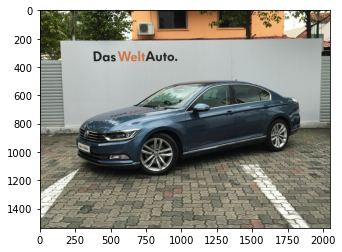

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(data_path_train_images+"img11.jpg")
imgplot = plt.imshow(img)

# **2. Annotate each of the objects inside the image**

In this section we will prepare the collected image label. With the help of the LabelImage utility we will label name of the object and the 2 dimension bounding box parameters.



### Exercise
Download the LabelImage utility from https://tzutalin.github.io/labelImg/ into Lab local drive.

In Lab Computer local drive , run LabelImage.exe

Perform the annoatation with the images store in the local computer train and validation directories.

Output of annotation will be the image files with the corresponding xml files


<img src="./doc_images/labelimage.png">


In the utility browse through each image in the local drive directory, annotate the car object by drawing a bounding car. A correspond XML file will be generated for each image.


Transfer all the local drive XML file into the VM

After completed all the annotation for train images in local drive train folder, copy all the XML files into the VM annotation directories ./dataset/Lab2dataset/train/annotations

After completed all the annotation for validation images in local drive validation folder, copy all the XML files into the VM annotation directories ./dataset/Lab2dataset/validation/annotations

# **3. Train the model with the training set and evaluate it performance**

YOLO is very popular because it achieves high accuracy while also being able to run in real-time. The algorithm “only looks once” at the image in the sense that it only requires the image or the video to pass through the neural network once to make predictions.

With YOLO, a single CNN simultaneously predicts multiple bounding boxes and class probabilities for those boxes. This basically means they recognize where the object is at and uses bounding boxes to show where it is at, and uses class probability to determine what the object is.


<img src="./doc_images/yolo.png">


### Execrise

In this exercise we are going to define the Custom YOLO Object Detection model and perform training.

We will reuse a YOLO pre-trained model in our problem, this is also known as transfer learning. Transfer learning exploits the knowledge gained from a previous task to improve generalization about another. 


1.   Import the imageai module. This module provides a YOLO model that can be trained with our custom dataset

```
from imageai.Detection.Custom import DetectionModelTrainer
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
```

2.   Set the path to the image dataset we want to train the network on
```
trainer.setDataDirectory(data_directory=data_dir_path)
```
3.   Configured our YOLO object detection model 
```
trainer.setTrainConfig(object_names_array=[#add code], batch_size=#add code, num_experiments=#add code, train_from_pretrained_model=car_dir_path+"pretrained-yolov3.h5")
```

    *   object_names_array : this is an array containing the names of the objects in our dataset(in our case we labeled it car)
    *   batch_size : this is to state the batch size for the training
    *   num_experiments : this is to state the number of times the network will train over all the training images, which is also called epochs
    *   train_from_pretrained_model : this is to train using transfer learning from a pre-trained YOLOv3 model




4.    start the training, you should see something like this in the console
```
trainer.trainModel()
```

Observe the training loss result by applying different batch size and epoch(num_experiements).



In [7]:
#1.
from imageai.Detection.Custom import DetectionModelTrainer
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
#2.
# car_dir_path= data_dir_path
trainer.setDataDirectory(data_directory=data_dir_path)
#3.
trainer.setTrainConfig(object_names_array=["car"], batch_size=4, num_experiments=1, train_from_pretrained_model=data_dir_path+"pretrained-yolov3.h5")

#4.
trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.92
Anchor Boxes generated.
Detection configuration saved in  ./dataset/Lab2dataset/json\detection_config.json
Training on: 	['car']
Training with Batch Size:  4
Number of Experiments:  1
Training with transfer learning from pretrained Model
Epoch 1/1
 1/40 [..............................] - ETA: 24:39 - loss: 170.8277 - yolo_layer_7_loss: 25.2211 - yolo_layer_8_loss: 43.9963 - yolo_layer_9_loss: 101.6104

KeyboardInterrupt: 

# 4. Prediction using trained model

1.   Import the ImageAI custom YOLO object detection class, created the class instance
```
from imageai.Detection.Custom import CustomObjectDetection
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
```


2.   Specified the file path to our custom trained model file and specified the path to detection_config.json file
```
car_dir_path= data_dir_path
detector.setModelPath(#add code- path and trained model file name)
detector.setJsonPath(data_dir_path+"json/detection_config.json")
```
3.   loaded the model
```
detector.loadModel()
```


4.   Run the detectObjectsFromImage() function and parse in the path to our test image, and the path to the new image which the function will save
```
detections = detector.detectObjectsFromImage(input_image=#add code, output_image_path=#add code)
```

5. Then the function returns an array of dictionaries with each dictionary corresponding to the number of objects detected in the image. Each dictionary has the properties name (name of the object), percentage_probability (percentage probability of the detection) and box_points (the x1,y1,x2 and y2 coordinates of the bounding box of the object).

The label name shows the object being classified and the probability displayed how confidence the object being predicted. And the box points show the localization of the object using the bottom left coordinate and the upper right coordinate to form a bounding box.



```
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
```



### Exercise
We will use the trained YOLO object detection model to do this exercise. Defined the trained model file, the input images for prediction and the output image to store the predicted result. Run the prediction and observe the result label name, probability and box_points.

Try with different images and compare the results.

In [5]:
#1
from imageai.Detection.Custom import CustomObjectDetection
detector = CustomObjectDetection()
#2
detector.setModelTypeAsYOLOv3()
#3

detector.setModelPath(data_dir_path+"models/detection_model-ex-025--loss-0005.643.h5")
detector.setJsonPath(data_dir_path+"json/detection_config.json")
#4
detector.loadModel()
#5
detections = detector.detectObjectsFromImage(input_image=data_dir_path+"image4.jpg", output_image_path=data_dir_path+"image4-detected.jpg")
#6
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

car  :  69.3751871585846  :  [0, 545, 1355, 1054]
car  :  71.52528166770935  :  [827, 560, 1768, 1027]


In [ ]:
detections = detector.detectObjectsFromImage(input_image=hololens_dir_path+"image5.jpg", output_image_path=hololens_dir_path+"image5-detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

car  :  54.62257266044617  :  [62, 64, 191, 138]
